### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [1]:
!python setup.py build_ext --inplace 

running build_ext
running build_ext


# Import all the relevant files 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)


data_dir = "./Data/"
figure_dir = "./Figures/"

# Choose the experiment and create the main pipeline

In [4]:
#Choose the experiment
experimentchoice = 'stopsignal'
number_of_choices = 3

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

in choose pipeline
in reward pipeline


In [5]:
#Set a seed
num_sims = 1

seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [6]:
environment = {
    'experimentchoice': experimentchoice,
    'inter_trial_interval': None,
    'thalamic_threshold':30.,
    'movement_time':["constant",300],#default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout': 300,#default 1000
    
    
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"],["up"]], columns=['action']),
    'number_of_choices':number_of_choices,#action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5, 0.5]],columns=["left","right","up"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0.0,0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop - STN
    'stop_signal_present': True,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #Stop- D2STR
    'stop_signal_present_2': True,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1., # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["weight","optogenetic_input"],
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': 2.4, # ampitude of the stop signal over base line
    'opt_signal_onset': 20., # in ms
    'opt_signal_duration': 100.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPeA"],
}

In [7]:
results = cbgt.ExecutionManager(cores=7).run([pl]*num_sims,[environment]*num_sims)

SpawnThreadManagers <backend.Pipeline object at 0x7f46ed74e2b0>
SpawnThreadManagers <backend.Pipeline object at 0x7f46f462c3a0>
SpawnThreadManagers <backend.Pipeline object at 0x7f46f462cc70>
(worker pid=None) in choose pipeline
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None)        left  right   up
(worker pid=None) 0  1.176405    0.0  0.0
(worker pid=None) 1  1.040016    0.0  0.0
(worker pid=None) 2  1.097874    0.0  0.0
(worker pid=None) change points: [0 1 2 2]
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None) <class 'float'>
(worker pid=None) [2 0 1]
(worker pid=None) <class 'float'>
(worker pid=None) [2 1 0]
(worker pid=None) in choose pipeline
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None)        left  right   up
(worker pid=None) 0  1.176405    0.0  0.0
(worker pid=None) 1  1.040016    0.0  0.0
(worker pid=None) 2  1.097874    0.0  0.0
(worker pid=None) change points: [0 1 2 2]
(worker pid=None) conflict (1.0, 0.0)
(worker pid=None) <class 'float'>
(worke

(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(
(worker pid=None) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=None)   Q_df = Q_df.append(


(worker pid=None) agent.opt_popids [ 9 10 11]
(worker pid=None) agent.opt_popids [ 9 10 11]
(worker pid=None) gateFRs [26.88888889 22.88888889 22.22222222]
(worker pid=None) thresholds_crossed []
(worker pid=None) gateFRs [26.88888889 22.88888889 22.22222222]
(worker pid=None) thresholds_crossed []
(worker pid=None) trial_num 0
(worker pid=None)   action
(worker pid=None) 0   left
(worker pid=None) 1  right
(worker pid=None) 2     up
(worker pid=None) chosen_action: stop
(worker pid=None) trial_num 0
(worker pid=None) trial_num 0
(worker pid=None)   action
(worker pid=None) 0   left
(worker pid=None) 1  right
(worker pid=None) 2     up
(worker pid=None) chosen_action: stop
(worker pid=None) trial_num 0
(worker pid=None) gateFRs [24.         23.11111111 20.66666667]
(worker pid=None) thresholds_crossed []
(worker pid=None) gateFRs [24.         23.11111111 20.66666667]
(worker pid=None) thresholds_crossed []
(worker pid=None) trial_num 1
(worker pid=None)   action
(worker pid=None) 0   l

In [8]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'number_of_choices', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'par', 'popconstruct', 'ml', 'gen_stop', 'gen_stop_2', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy

In [9]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:219: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [10]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,stop,0,301,301,602,602,left,0
1,stop,1203,1504,301,602,1805,right,0
2,stop,2406,2707,301,602,3008,left,0


In [11]:
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    301
1    301
2    301
dtype: object

In [12]:
import importlib

importlib.reload(plt_func)

<module 'plotting_functions' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_functions.py'>

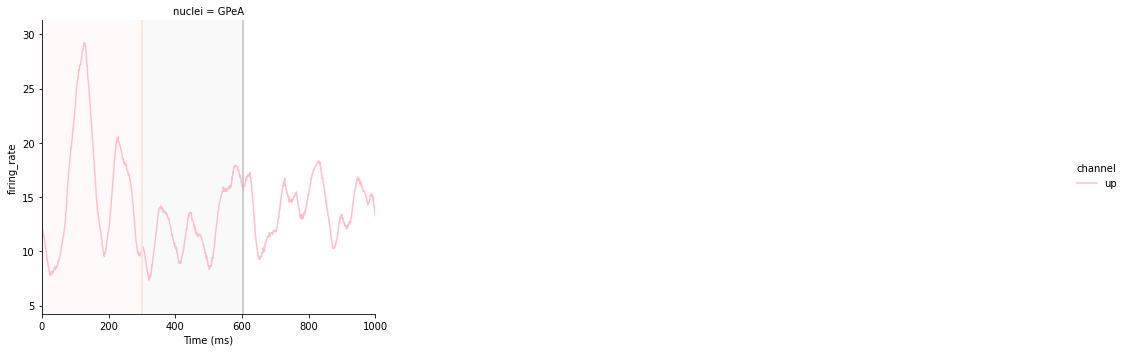

In [22]:
FR_fig_handles = plt_func.plot_fr_flex(firing_rates[0],datatables[0],  ['up'], ['GPeA'], (0, 1000)) 

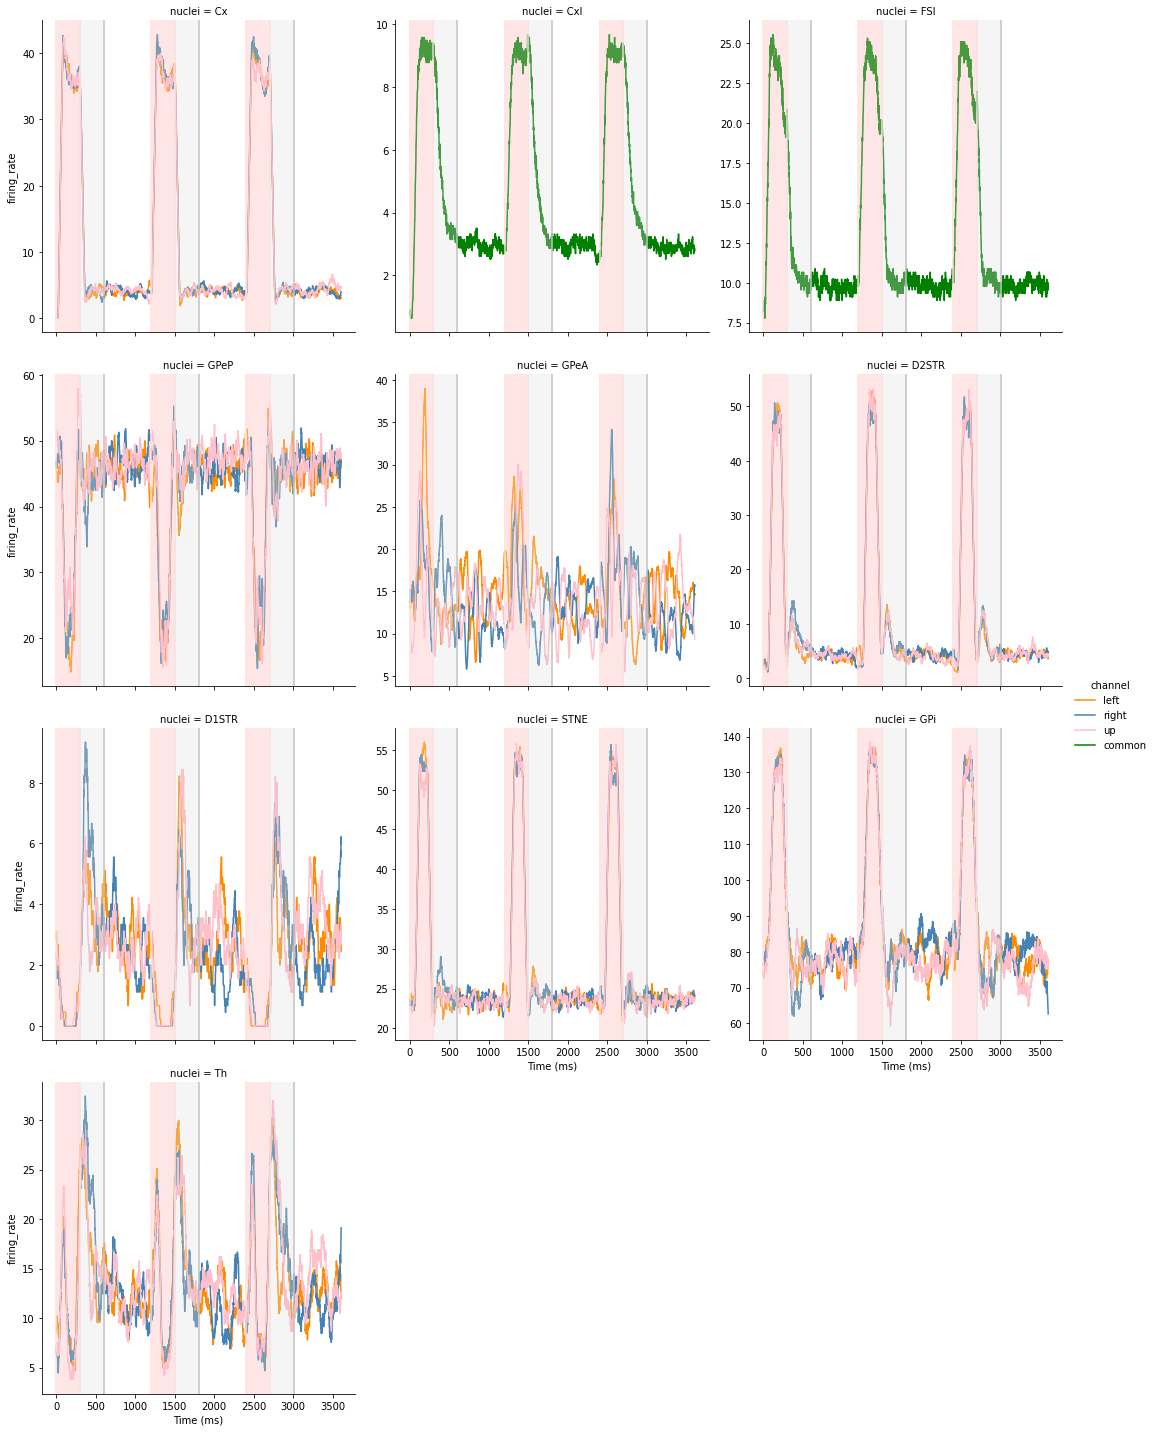

In [26]:
FR_fig_handles = plt_func.plot_fr_stop(firing_rates, datatables)